In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
stats.chisqprob=lambda chisq, df: stats.chi2.sf(chisq, df)

In [25]:
raw_data=pd.read_csv('2.02.+Binary+Predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [27]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data['Gender']=data['Gender'].map({'Female':1,'Male':0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [29]:
#Male is the baseline or reference group
y=data['Admitted']
x1=data['Gender']
y

0      0
1      1
2      1
3      0
4      0
      ..
163    1
164    1
165    0
166    0
167    0
Name: Admitted, Length: 168, dtype: int64

In [31]:
x=sm.add_constant(x1)
log_reg=sm.Logit(y,x)
log_results=log_reg.fit()
log_results.summary()

Optimization terminated successfully.
         Current function value: 0.572260
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                  0.1659
Time:                        16:53:28   Log-Likelihood:                -96.140
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 6.283e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6436      0.222     -2.901      0.004      -1.078      -0.209
Gender         2.0786      0.363      5.727      0.000       1.367       2.790
==============================================================================
"""

In [33]:
#model is log(odds)=-.64+2.08*Gender
#Gender can only be either 0 or 1, so diff bw gender is 1.
#log(odds2/odds1)=2.08*(Gender2-Gender1)
#log(odds2/odds1)=2.08*(1-0). odds2 are odds of a female to get admitted, while odds1 are odds of a male to get admitted
#log(oddsf/oddsm)=2.08
#taking exponents of both sides
np.exp(2.0786)

7.993270498536442

In [31]:
#odds of a female to get admitted are 7.99 times odds of a male to get odmitted

In [43]:
#including SAT and gender in model
x1=data[['SAT','Gender']]

In [45]:
x=sm.add_constant(x1)
log_reg=sm.Logit(y,x)
log_results=log_reg.fit()
log_results.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 Jan 2025   Pseudo R-squ.:                  0.8249
Time:                        17:01:39   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [47]:
#Log-likelihood is higher, meaning model is better
np.exp(1.9449)

6.992932526814459

In [43]:
#Given the same SAT score, a female is 7 times more likely to be admitted than a male

C:\Users\navee\AppData\Local\Temp\ipykernel_12676\4082756553.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b0=log_results.params[0]
C:\Users\navee\AppData\Local\Temp\ipykernel_12676\4082756553.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b1=log_results.params[1]
C:\Users\navee\AppData\Local\Temp\ipykernel_12676\4082756553.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b2=log_results.params[2]


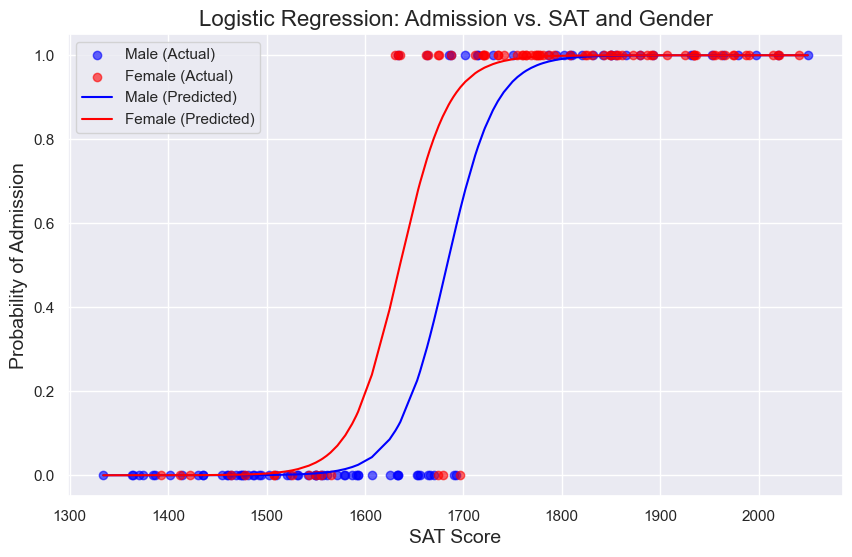

In [67]:
b0=log_results.params[0]
b1=log_results.params[1]
b2=log_results.params[2]
x_sorted=np.sort(x1['SAT'])
#2 curves will be created, 1 for male and 1 for female
f_male = np.exp(b0 + b1 * x_sorted + b2 * 0) / (1 + np.exp(b0 + b1 * x_sorted + b2 * 0))  # Gender = 0 (Male)
f_female = np.exp(b0 + b1 * x_sorted + b2 * 1) / (1 + np.exp(b0 + b1 * x_sorted + b2 * 1))  # Gender = 1 (Female)

plt.figure(figsize=(10, 6))

# Scatter original data
plt.scatter(x1['SAT'][x1['Gender'] == 0], y[x1['Gender'] == 0], color='blue', label='Male (Actual)', alpha=0.6)
plt.scatter(x1['SAT'][x1['Gender'] == 1], y[x1['Gender'] == 1], color='red', label='Female (Actual)', alpha=0.6)

# Plot logistic curves
plt.plot(x_sorted, f_male, color='blue', label='Male (Predicted)')
plt.plot(x_sorted, f_female, color='red', label='Female (Predicted)')

plt.xlabel('SAT Score', fontsize=14)
plt.ylabel('Probability of Admission', fontsize=14)
plt.title('Logistic Regression: Admission vs. SAT and Gender', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

In [65]:
#f_male and f_female compute probabilities for males (Gender = 0) and females (Gender = 1) based on the logistic model.
#Actual data points are visualized by separating males and females (Gender column) for better clarity
#Two curves are plotted for the relationship between SAT and the probability of admission, conditioned on gender.
#Blue dots: Actual admission outcomes for males (Gender = 0).
#Red dots: Actual admission outcomes for females (Gender = 1).
#These represent whether an applicant was admitted (Admitted = 1) or not (Admitted = 0), plotted against their SAT scores.
#Blue curve: Logistic regression predictions for males (Gender = 0).
#Red curve: Logistic regression predictions for females (Gender = 1).
#These curves represent the model's predicted probability of admission as a function of SAT scores, differentiated by gender.
#The red curve (females) is shifted to the left compared to the blue curve (males).
#This indicates that, for the same SAT score, females have a higher probability of admission than males. 
#The logistic regression model shows a clear gender-based disparity in the probability of admission, with females being more likely to be admitted at 
#lower SAT scores compared to males.
#This might reflect a bias in the admissions process or an adjustment based on other unobserved factors.

In [71]:
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})
log_results.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [75]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [77]:
log_results.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [81]:
cm_df=pd.DataFrame(log_results.pred_table())
cm_df.columns=['Predicted 0','Predicted 1']
cm_df=cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [86]:
accuracy=((69+90)/(69+90+4+5))*100

In [88]:
accuracy

94.64285714285714

In [90]:
cm=np.array(cm_df)
accuracy_train=(cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

In [94]:
accuracy_train*100

94.64285714285714

In [9]:
test = pd.read_csv('2.03.+Test+dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [11]:
test['Admitted'] = test['Admitted'].map({'Yes': 1, 'No': 0})
test['Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [49]:
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [55]:
#order is very important as coeffs will expect it, wrong order will affect predictions
test_actual=test['Admitted']
test_data=test.drop(['Admitted'],axis=1)
test_data=sm.add_constant(test_data)
#to reorder columns use test_data[x.columns.values]
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [57]:
#SM doesn't provide ability to create a confusion matrix
# data: data frame or array
# data is a data frame formatted in the same way as your input data (without the actual values)
# e.g. const, var1, var2, etc. Order is very important!
#actual_values: data frame or array. These are the actual values from the test_data
#In the case of a logistic regression, it should be a single column with 0s and 1s
#model: a LogitResults object. this is the variable where you have the fitted model, e.g. log_results in this course
def confusion_matrix(data,actual_values,model):
    pred_values=model.predict(data)
#Specify the bins 
    bins=np.array([0,0.5,1])
#Create a histogram, where if values are between 0 and 0.5 they will be considered 0
#if they are between 0.5 and 1, they will be considered 1
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
# Return the confusion matrix and the accuracy
    return cm, accuracy

In [59]:
cm=confusion_matrix(test_data,test_actual,log_results)
cm

(array([[ 5.,  1.],
        [ 1., 12.]]),
 0.8947368421052632)

In [61]:
#accuracy is model's accuracy. Almost always training accuracy is higher than test accuracy because of overfitting, but that doesn't mean preds are true for all values of pop
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [65]:
#opposite of accuracy is misclassification rate. it =missclassified elements/ all elements
print('Misclassification rate: '+str((1+1)/19))

Misclassification rate: 0.10526315789473684
